## Lab #4:

### Looking through all the folders:

In [1]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('data/101_food/train'):
    f.extend(dirnames)
    break
    
f[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

### Choosing certain data, according to the student index:

In [2]:
n = 10

class_names = [f[n-1], f[n+29], f[n+59]]
class_names

['breakfast_burrito', 'foie_gras', 'oysters']

### Making arrays from images:

In [3]:
from PIL import Image
from numpy import asarray

images = []
for folder in class_names:
    for (dirpath, dirnames, filenames) in walk('data/101_food/train/' + folder):
        for img_name in filenames:
            images.append(asarray(Image.open('data/101_food/train/' + folder + '/' + img_name)))

In [4]:
images

[array([[[ 35,  30,  27],
         [ 41,  33,  31],
         [ 44,  36,  34],
         ...,
         [134, 100,  62],
         [133,  99,  61],
         [132,  99,  58]],
 
        [[ 37,  29,  27],
         [ 39,  31,  29],
         [ 42,  34,  32],
         ...,
         [135, 101,  63],
         [135, 101,  63],
         [134, 100,  62]],
 
        [[ 38,  30,  28],
         [ 38,  30,  28],
         [ 40,  32,  30],
         ...,
         [136, 104,  66],
         [137, 103,  65],
         [136, 102,  64]],
 
        ...,
 
        [[164,  97,  26],
         [165,  98,  28],
         [167, 100,  30],
         ...,
         [156,  95,  30],
         [159,  98,  33],
         [162,  98,  34]],
 
        [[152,  85,  15],
         [154,  87,  17],
         [156,  89,  21],
         ...,
         [157,  96,  31],
         [159,  98,  33],
         [162,  98,  34]],
 
        [[137,  68,   0],
         [140,  71,   4],
         [144,  75,   8],
         ...,
         [153,  92,  27],
  

### And images from arrays:

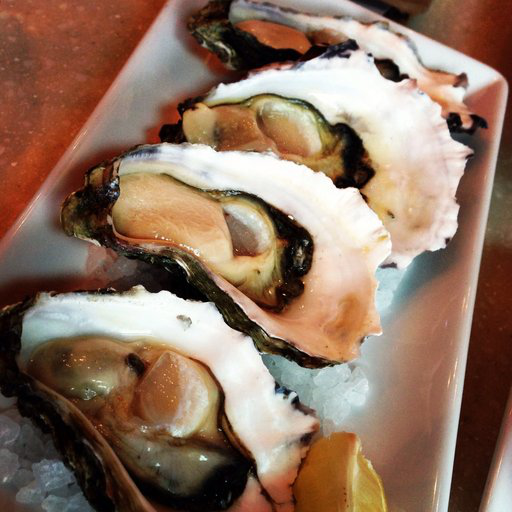

In [5]:
Image.fromarray(images[202])

### Visualizing some of data:

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


<Figure size 720x2160 with 0 Axes>

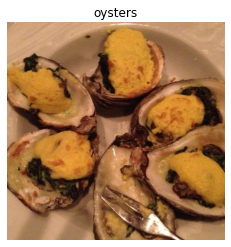

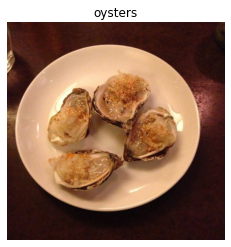

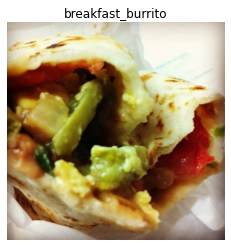

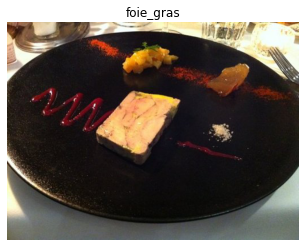

In [7]:
import random

secure_random = random.SystemRandom()
plt.figure(figsize=(10,30))
for i in range(4):
    choice = secure_random.choice(class_names)
    plt.subplots()
    plt.grid('off')
    plt.imshow(view_random_image(target_dir="data/3_food/train/", target_class=choice))

### Preparing the data for the model:

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "data/3_food/train/"
test_dir = "data/3_food/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


### Building a classification model:

In [9]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=7,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/7
8/8 [==============================] - 28s 3s/step - loss: 1.1210 - accuracy: 0.3822 - val_loss: 1.0812 - val_accuracy: 0.4467
Epoch 2/7
8/8 [==============================] - 23s 3s/step - loss: 1.0370 - accuracy: 0.4711 - val_loss: 1.0441 - val_accuracy: 0.4320
Epoch 3/7
8/8 [==============================] - 23s 3s/step - loss: 0.9763 - accuracy: 0.4711 - val_loss: 1.0375 - val_accuracy: 0.4280
Epoch 4/7
8/8 [==============================] - 23s 3s/step - loss: 0.9294 - accuracy: 0.6444 - val_loss: 0.9606 - val_accuracy: 0.5720
Epoch 5/7
8/8 [==============================] - 23s 3s/step - loss: 0.8892 - accuracy: 0.6489 - val_loss: 0.9260 - val_accuracy: 0.5867
Epoch 6/7
8/8 [==============================] - 23s 3s/step - loss: 0.8050 - accuracy: 0.6711 - val_loss: 0.8887 - val_accuracy: 0.6133
Epoch 7/7
8/8 [==============================] - 23s 3s/step - loss: 0.6742 - accuracy: 0.7644 - val_loss: 0.9172 - val_accuracy: 0.5947


<AxesSubplot:>

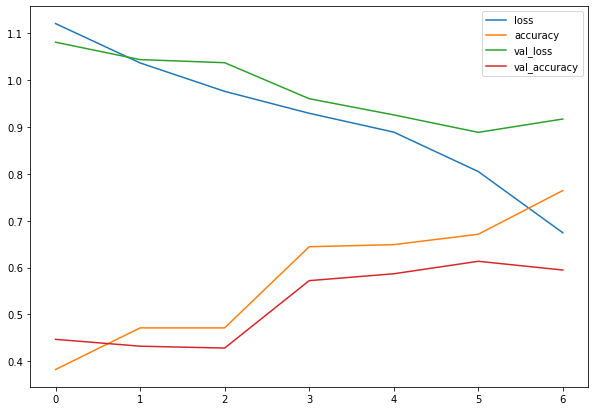

In [11]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

### Plotting the validation and training data:

In [12]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

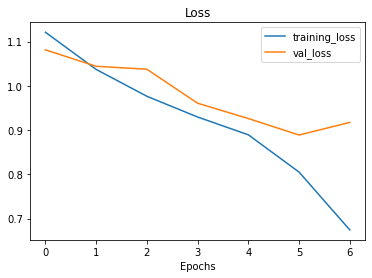

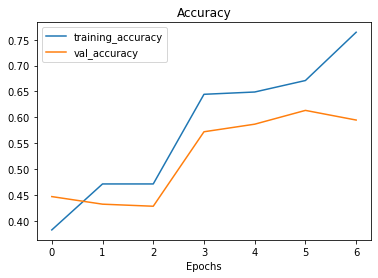

In [13]:
plot_loss_curves(history_1)

### Comparing the original image class with the predicted one:

In [14]:
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

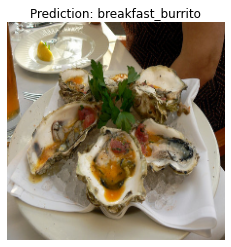

In [15]:
pred_and_plot(model_1, "data/3_food/train/oysters/6458.jpg", class_names)

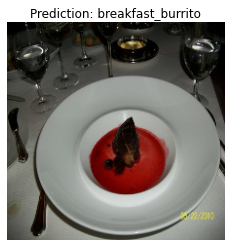

In [16]:
pred_and_plot(model_1, "data/3_food/train/foie_gras/53767.jpg", class_names)

> ### Conclusion:
_During this work we chose the '101-food' data according to the student index, visualized it and then prepared for modeling. We've built a model of Neural Network Flatten & Dense layers for categorical image classification and then compared the original image class with the predicted._

 #### Lab#4 was made by Ponomarova Darina